<a href="https://colab.research.google.com/github/quant-IT/Global-AI/blob/main/Medical%20Cost%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Cost Analysis ⚕💸

In the data set in this project, some information such as age, gender, body mass index, smoking, number of children and health expenditures are given. We will try to estimate the health expenditures of people according to these data. We will examine the effects of these features on health expenditures, one by one, and determine and visualize which one has the greater impact than the others.

In the next step, we will build our models using logistic regression, ridge classifier, decision tree, Naive Bayes and neural networks. After comparing the results of each model, we will find the model that performs best.


# 1.Creating a Google Colab File

A medical cost analysis file with the .ipynb extension was created.

## 2. Importing Required Libraries

📌 First we import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import sklearn as sc
import warnings
warnings.filterwarnings('ignore')

## 3. Perform An Exploratory Data Analysis

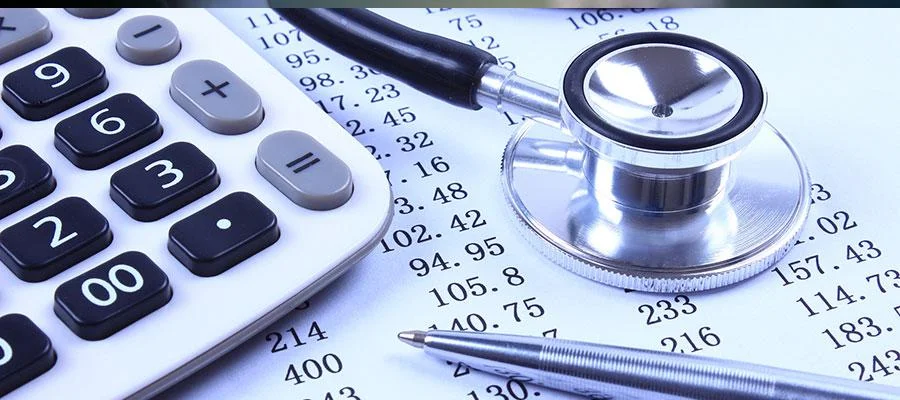

The dataset includes data from 1338 persons. Each of  these person samples have 6 features and medical cost.

### Read the data

Let’s read the .csv file.

📌 Use the read_csv() function of the Pandas library.

In [2]:
# Read the "insurance.csv" file
insurance = pd.read_csv("insurance.csv")
df=insurance.copy()

###Visualize the data
Then we take a look at the dataset using the data.head() function

In [3]:
# We use the head() function to display the first 5 rows of data
## df.head(10) displays the first 10 rows.
## df.tail() displays the last 5 rows.

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# It is examined how many rows and columns the data consists of, whether the columns consist of categorical or numerical values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Values of numerical values such as mean, standard deviation, minimum, maximum are examined.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
## We look at the headings of our categorical data and the unique values under those headings.
for i in df.select_dtypes("object"):
    print(f"{i:<10}:", df[i].unique())

sex       : ['female' 'male']
smoker    : ['yes' 'no']
region    : ['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
## Let's check the numbers of our unique values.
for col in df.columns:
    print(f"{col:<10}:", df[col].nunique())

age       : 47
sex       : 2
bmi       : 548
children  : 6
smoker    : 2
region    : 4
charges   : 1337


In [8]:
# Import Matplotlib
import matplotlib.pyplot as plt

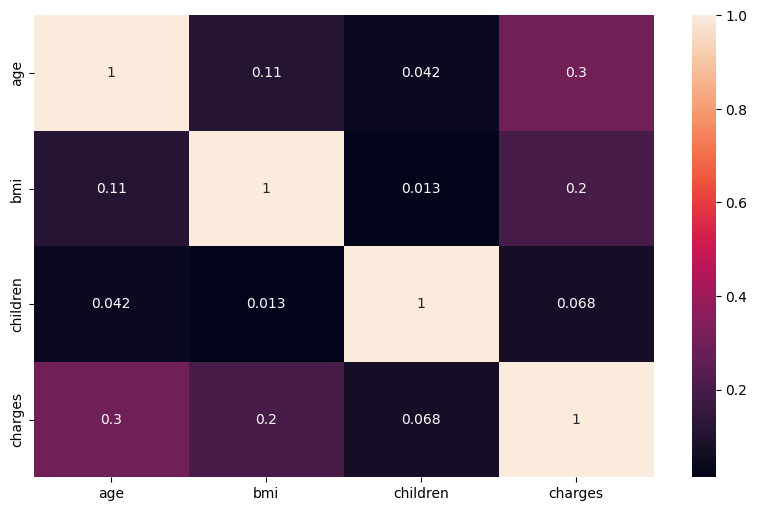

In [9]:
## We analyze the correlation relationship between numerical data.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot =True);

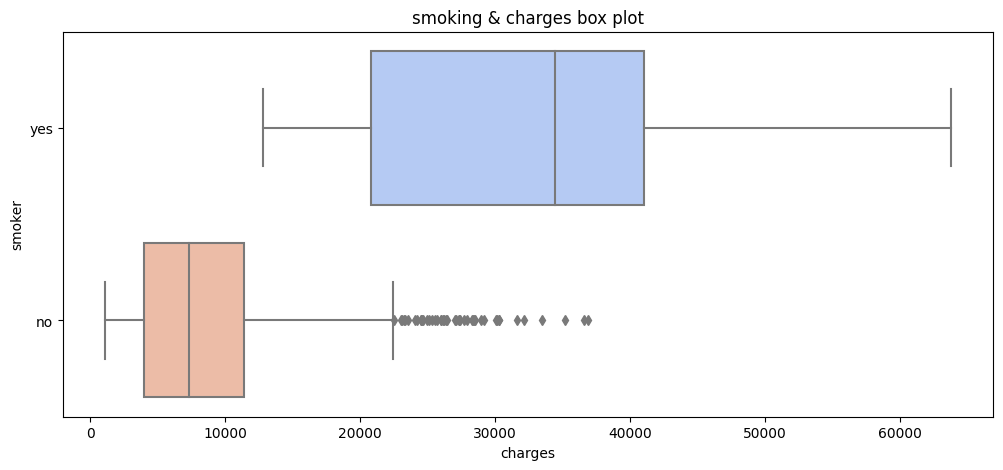

In [10]:
plt.figure(figsize=(12,5))
plt.title("smoking & charges box plot")
sns.boxplot(y="smoker", x="charges", data =  df , orient="h", palette = 'coolwarm');

In [11]:
print("average medical cost of smokers=", df[df['smoker'] == 'yes']['charges'].mean())
print("average medical cost of non-smokers=", df[df['smoker'] == 'no']['charges'].mean())


average medical cost of smokers= 32050.23183153284
average medical cost of non-smokers= 8434.268297856204


### From this review, it is seen that the effect of smoking on medical costs is quite high.

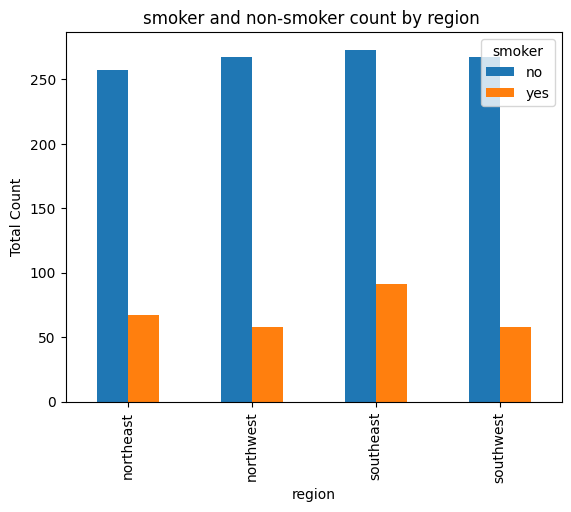

In [12]:
group1 = df.groupby(['region', 'smoker']).size().unstack()
group1.plot(kind='bar')

plt.title("smoker and non-smoker count by region ")
plt.xlabel("region")
plt.ylabel("Total Count")
plt.legend(title='smoker')
plt.show()

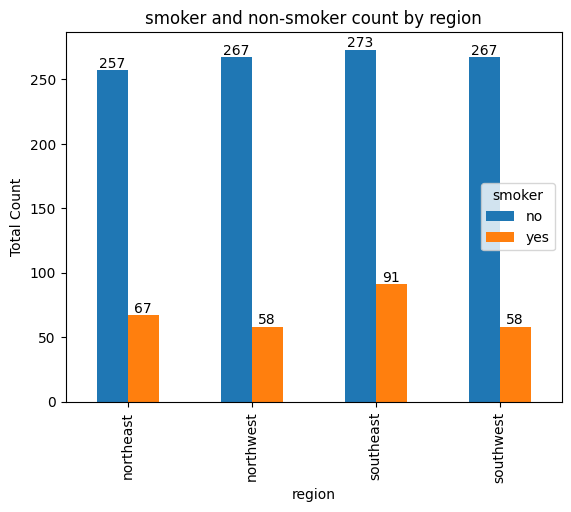

In [13]:
ax = group1.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title("smoker and non-smoker count by region")
plt.xlabel("region")
plt.ylabel("Total Count")
plt.legend(title='smoker', loc='center right')
plt.show();

### It was determined that the regions did not have a significant effect on smoking.

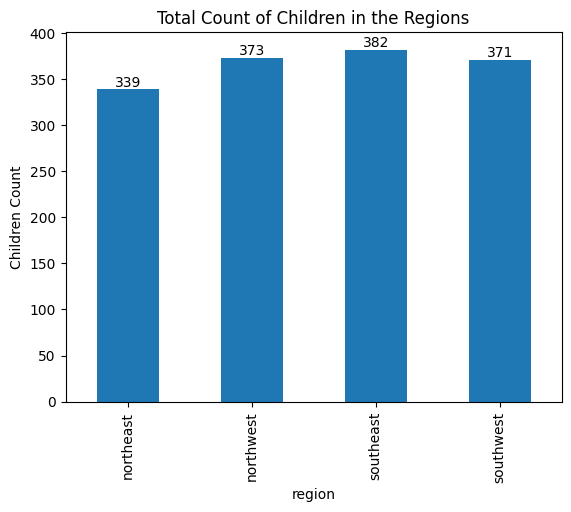

In [14]:
region_child_sum = df.groupby('region')['children'].sum()
ax = region_child_sum.plot(kind='bar')
plt.title("Total Count of Children in the Regions")
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("region")
plt.ylabel("Children Count")
plt.show();

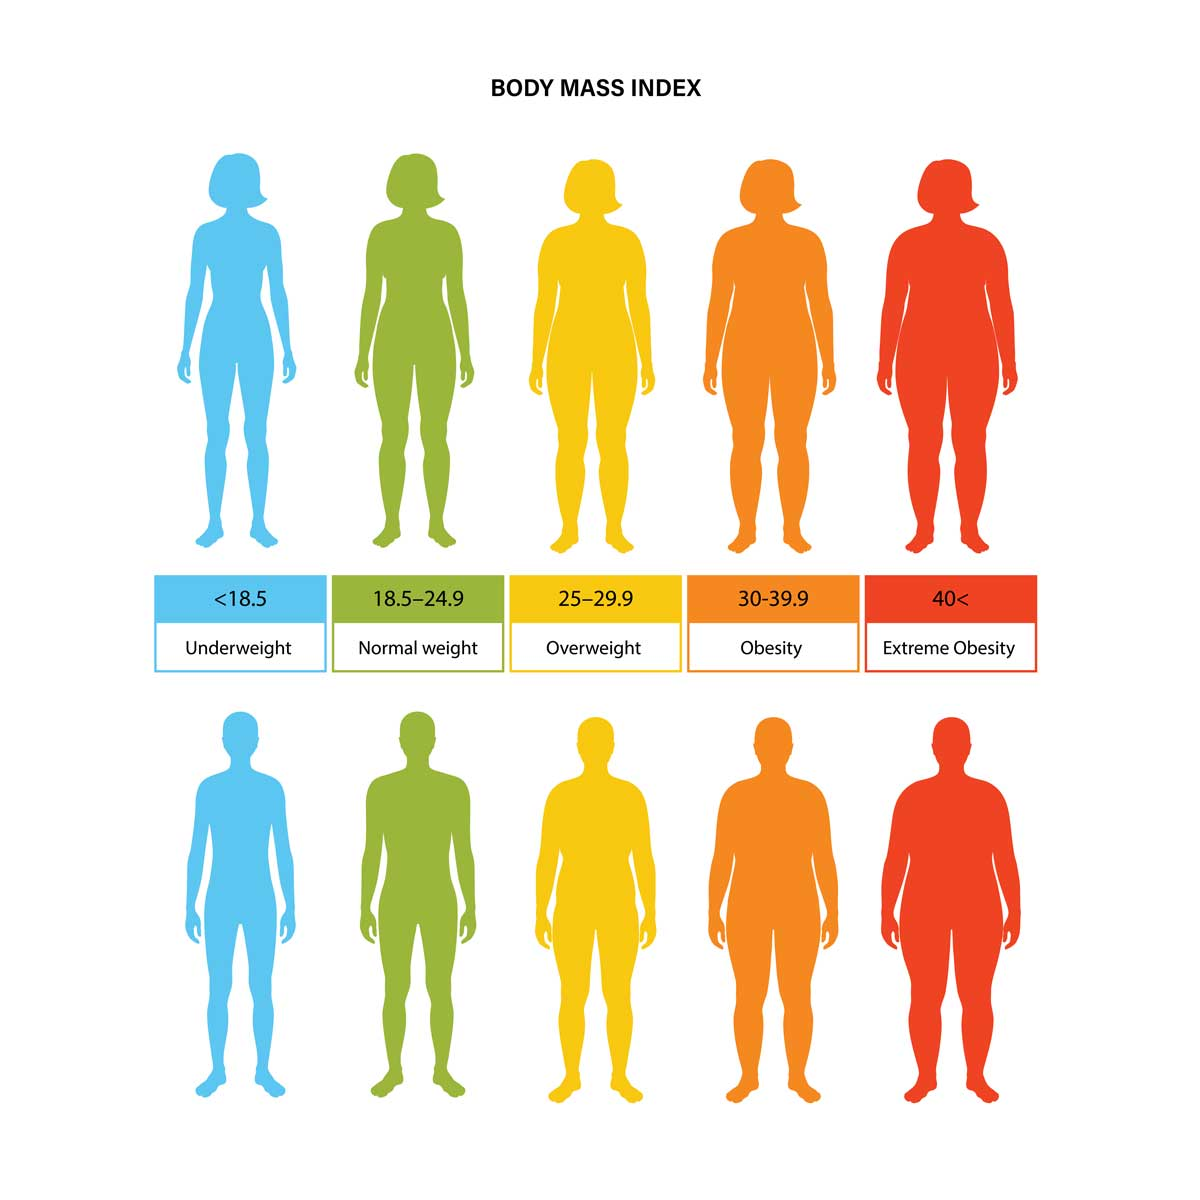
Body mass index is a measurement used to calculate body fat ratio based on a person's height and weight measurements. BMI is calculated by dividing weight in kilograms by the square of height in meters. BMI is used to determine whether a person's weight is normal, underweight, or overweight for their height, and is often used as a guide to help maintain a healthy body weight. However, BMI alone is not sufficient as a measure of health and other factors such as fat distribution, muscle mass, age, gender, genetic characteristics must also be taken into account.

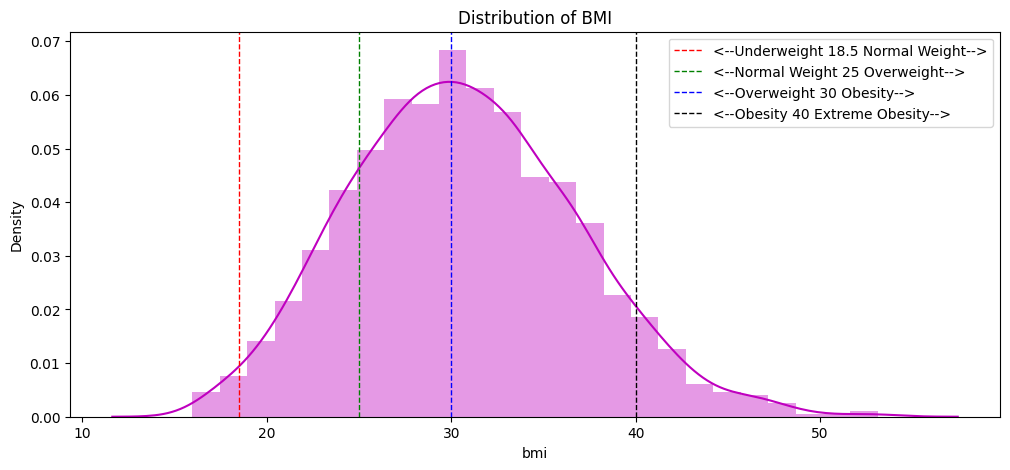

In [15]:
plt.figure(figsize=(12,5))
plt.title("Distribution of BMI")
ax = sns.distplot(df.bmi, color = 'm')
plt.axvline(x=18.5, color='red', linewidth=1, linestyle='--', label='<--Underweight 18.5 Normal Weight-->')
plt.axvline(x=25, color='green', linewidth=1, linestyle='--', label='<--Normal Weight 25 Overweight-->')
plt.axvline(x=30, color='blue', linewidth=1, linestyle='--', label='<--Overweight 30 Obesity-->')
plt.axvline(x=40, color='black', linewidth=1, linestyle='--', label='<--Obesity 40 Extreme Obesity-->');
plt.legend()
plt.show()


In [16]:
def transform_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal weight"
    elif 25 <= bmi < 30:
        return "Over weight"
    elif 30 <= bmi < 40:
        return "Obesity"
    else:
        return "Extreme Obesity"

df['bmi_class'] = df['bmi'].apply(transform_bmi)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,Over weight
1,18,male,33.770,1,no,southeast,1725.55230,Obesity
2,28,male,33.000,3,no,southeast,4449.46200,Obesity
3,33,male,22.705,0,no,northwest,21984.47061,Normal weight
4,32,male,28.880,0,no,northwest,3866.85520,Over weight


In [18]:
df["bmi_class"].value_counts().sort_values(ascending=False)

Obesity            616
Over weight        386
Normal weight      225
Extreme Obesity     91
Underweight         20
Name: bmi_class, dtype: int64

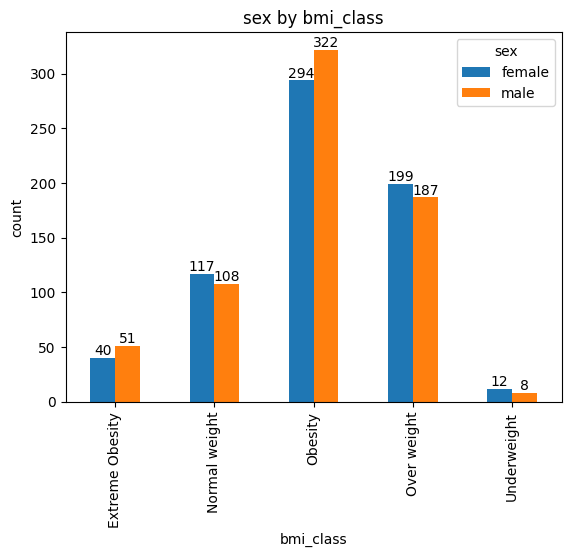

In [19]:
group2 = df.groupby(['bmi_class', 'sex']).size().unstack()
ax = group2.plot(kind='bar')
for container in ax.containers:
    ax.bar_label(container)
plt.title("sex by bmi_class")
plt.xlabel("bmi_class")
plt.ylabel("count")
plt.legend(title='sex')
plt.show()

In [38]:
def transform_age(age):
    if age < 25:
        return "0-25"
    elif 25 <= age < 35:
        return "25-35"
    elif 35 <= age < 45:
        return "35-45"
    elif 45 <= age < 55:
        return "45-55"
    else:
        return "Over 55"


df['age_class'] = df['age'].apply(transform_age)

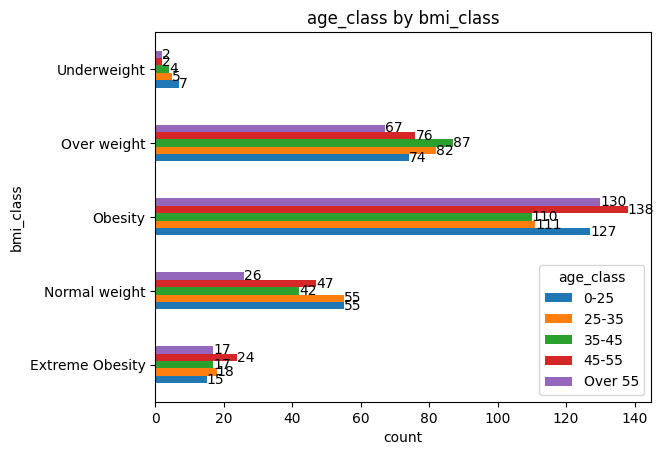

In [39]:
group3 = df.groupby(['bmi_class', 'age_class']).size().unstack()
ax = group3.plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container)
plt.title("age_class by bmi_class")
plt.xlabel("count")
plt.ylabel("bmi_class")
plt.legend(title='age_class', loc='lower right')
plt.show();

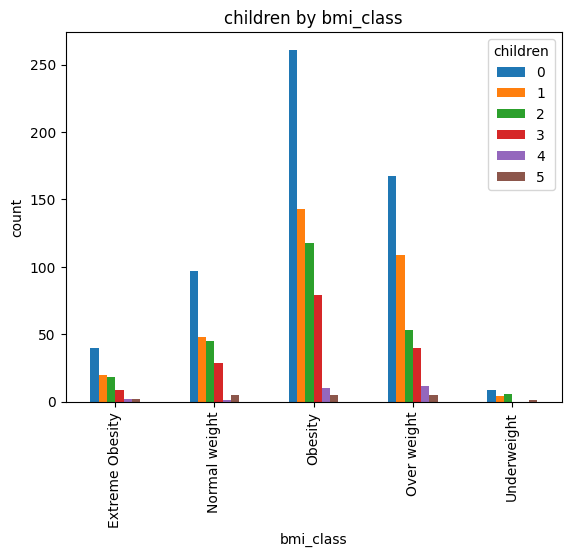

In [67]:
group4 = df.groupby(['bmi_class', 'children']).size().unstack()
ax = group4.plot(kind='bar')

plt.title("children by bmi_class")
plt.xlabel("bmi_class")
plt.ylabel("count")
plt.legend(title='children')
plt.show();

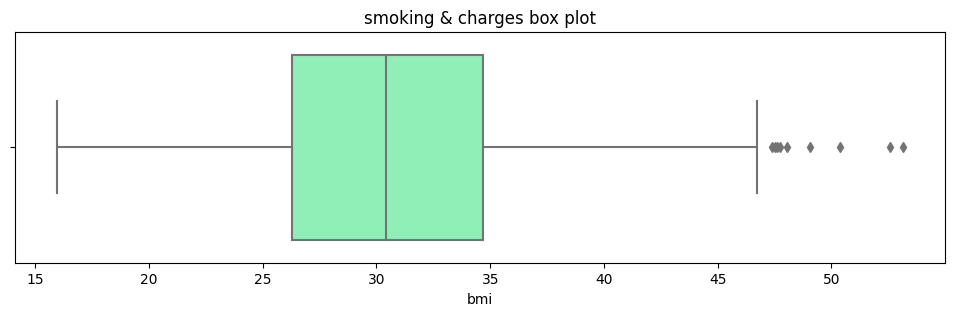

In [77]:
plt.figure(figsize=(12,3))
plt.title("smoking & charges box plot")
sns.boxplot( x='bmi', data =  df , orient="h", palette = 'rainbow');

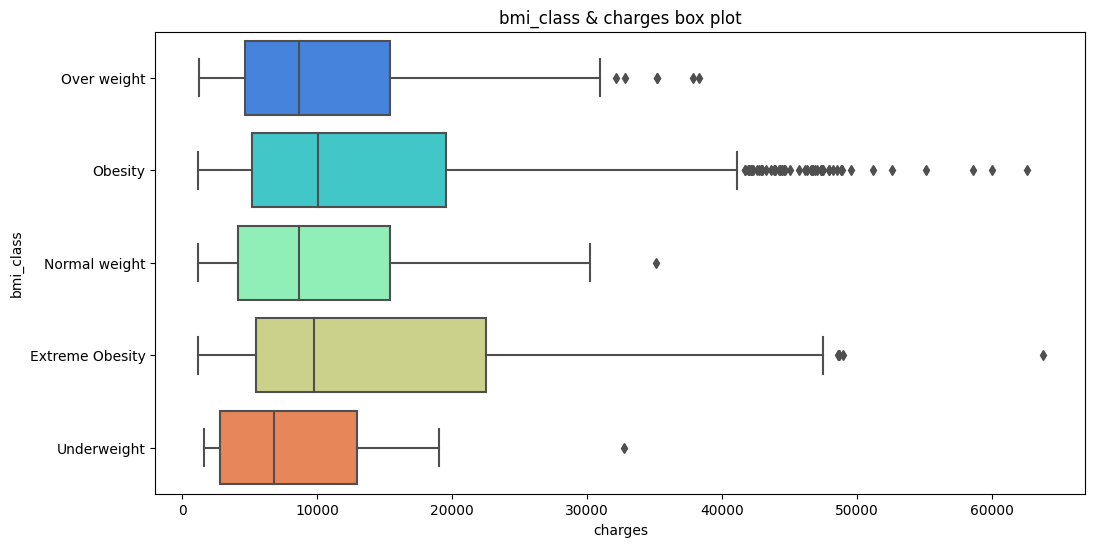

In [87]:
plt.figure(figsize=(12,6))
plt.title("bmi_class & charges box plot")
sns.boxplot( y='bmi_class', x='charges', data =  df , orient="h", palette = 'rainbow');

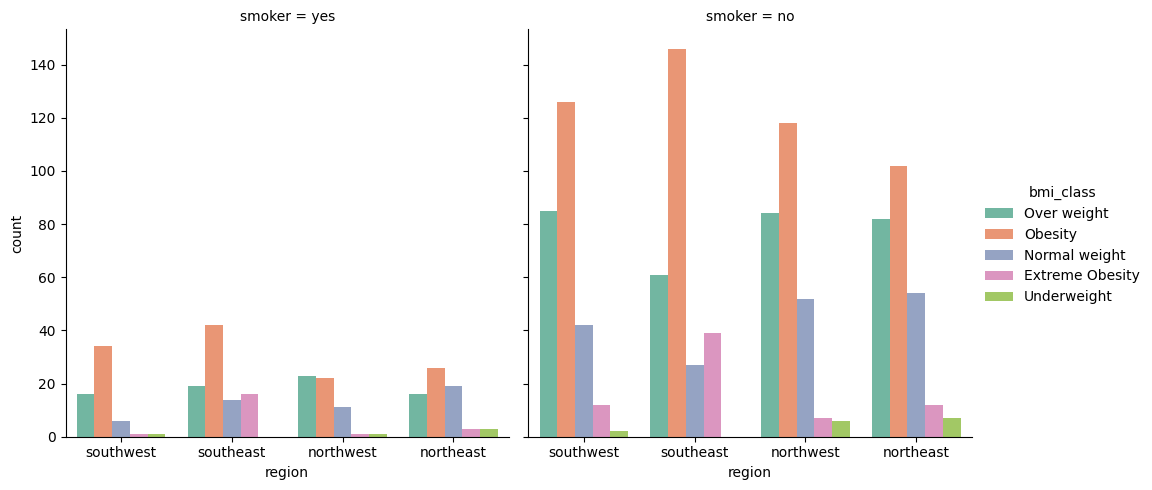

In [95]:
sns.catplot(data=df, x='region', hue='bmi_class', col='smoker', kind='count', palette='Set2')
plt.show()

In [96]:
# We import the 'LabelEncoder' class to convert categorical data into numeric labels.
from sklearn.preprocessing import LabelEncoder
#sex
# The unique values of the 'sex' variable are retrieved. Fitting is performed on these values. (female=0, male=1)
le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

# smoker or not
# The unique values of the 'smoker' variable are retrieved. Fitting is performed on these values. (no=0, yes=1)
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

#region
# The unique values of the 'smoker' variable are retrieved. Fitting is performed on these values. (northeast=0, northwest=1, southeast=2, southwest=3)
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [97]:
## Let's look at the converted data frame again.
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class,age_class
0,19,0,27.900,0,1,3,16884.92400,Over weight,0-25
1,18,1,33.770,1,0,2,1725.55230,Obesity,0-25
2,28,1,33.000,3,0,2,4449.46200,Obesity,25-35
3,33,1,22.705,0,0,1,21984.47061,Normal weight,25-35
4,32,1,28.880,0,0,1,3866.85520,Over weight,25-35


### Features and labels


In [98]:
df = df.drop(["bmi_class", "age_class","region"], axis=1)

In [99]:
df.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [100]:
y=df['charges']
X=df.drop(['charges'], axis=1)


In [101]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [102]:
X

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [105]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [106]:
lm.intercept_

-12281.486440111681

In [107]:
lm.coef_

array([  245.76084378,  -119.88359633,   344.61768833,   465.91302532,
       23880.61777827])

In [108]:
X_test[:5]

,age,sex,bmi,children,smoker
139,22,0,36.000,0,0
1275,57,1,23.700,0,0
332,61,0,31.160,0,0
372,42,0,33.155,1,0
1283,18,1,30.030,1,0


In [109]:
y_pred=lm.predict(X_test)

In [110]:
y_pred[:5]

array([ 5531.4889029 ,  9774.43727256, 13448.21219894,  9932.18148059,
        2837.10735744])

**Mean Squared Error (MSE):** The average of the squared differences between the predicted values and the actual values. It penalizes larger errors more heavily.

**Root Mean Squared Error (RMSE):** The square root of the MSE. It's in the same unit as the target variable, which makes it easier to interpret.

**Mean Absolute Error (MAE):** The average of the absolute differences between the predicted values and the actual values. It treats all errors equally and doesn't penalize outliers as much as MSE.

**R-squared (Coefficient of Determination):** Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where a value closer to 1 indicates a better fit.

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [112]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {
    "R2" : r2_score(y_train, y_train_pred),
    "MAE" : mean_absolute_error(y_train, y_train_pred),
    "MSE" : mean_squared_error(y_train, y_train_pred),
    "RMSE" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {
    "R2" : r2_score(y_test, y_pred),
    "MAE" : mean_absolute_error(y_test, y_pred),
    "MSE" : mean_squared_error(y_test, y_pred),
    "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

In [113]:
pd.options.display.float_format = '{:.3f}'.format

In [114]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.752,0.736
MAE,4219.175,4162.076
MSE,37238717.532,34645121.289
RMSE,6102.353,5886.011


In [116]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [117]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [119]:
train_val(lm, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.752,0.736
MAE,4219.175,4162.076
MSE,37238717.532,34645121.289
RMSE,6102.353,5886.011


In [120]:
from sklearn.model_selection import cross_validate
lm2 = LinearRegression()
lm2.fit(X_train, y_train)
scores = cross_validate(lm2, X_train_scaled, y_train, scoring=['r2',
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
             return_train_score=True)

In [121]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.013,0.003,0.751,0.752,-4600.894,-4150.706,-42542595.245,-36661652.938,-6522.468,-6054.887
1,0.004,0.010,0.720,0.755,-4399.506,-4242.732,-38251704.309,-37160007.846,-6184.796,-6095.901
2,0.026,0.002,0.818,0.743,-3801.237,-4253.357,-31920033.809,-37862027.204,-5649.782,-6153.213
3,0.003,0.010,0.670,0.760,-4832.050,-4112.215,-45720605.794,-36374670.401,-6761.701,-6031.142
4,0.009,0.002,0.792,0.743,-4718.078,-4178.654,-45618612.871,-36411571.819,-6754.155,-6034.200
5,0.003,0.010,0.760,0.751,-4100.649,-4238.733,-36836807.072,-37292308.666,-6069.333,-6106.743
6,0.011,0.002,0.776,0.749,-3400.278,-4301.969,-29361357.509,-38123417.372,-5418.612,-6174.416
7,0.003,0.002,0.606,0.760,-4086.513,-4251.461,-35971909.635,-37410524.971,-5997.659,-6116.414
8,0.003,0.012,0.769,0.750,-3989.110,-4268.322,-30622192.346,-38003810.012,-5533.732,-6164.723
9,0.003,0.002,0.692,0.758,-4590.957,-4174.611,-41879564.514,-36756662.725,-6471.442,-6062.727


In [122]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                     0.735
train_r2                                    0.752
test_neg_mean_absolute_error            -4251.927
train_neg_mean_absolute_error           -4217.276
test_neg_mean_squared_error         -37872538.310
train_neg_mean_squared_error        -37205665.395
test_neg_root_mean_squared_error        -6136.368
train_neg_root_mean_squared_error       -6099.437
dtype: float64

In [123]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.752,0.736
MAE,4219.175,4162.076
MSE,37238717.532,34645121.289
RMSE,6102.353,5886.011


In [124]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("Ridge", Ridge())]
ridge_pipe = Pipeline(steps=operations)

ridge_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('Ridge', Ridge())])

In [125]:
train_val(ridge_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.752,0.736
MAE,4220.406,4162.996
MSE,37238816.401,34646019.157
RMSE,6102.362,5886.087


In [126]:
from sklearn.linear_model import Lasso

In [127]:
operations = [("scaler", StandardScaler()), ("Lasso", Lasso())]
lasso_pipe = Pipeline(steps=operations)

lasso_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('Lasso', Lasso())])

In [128]:
train_val(lasso_pipe, X_train, y_train, X_test, y_test)

,train,test
R2,0.752,0.736
MAE,4219.133,4161.944
MSE,37238722.536,34645400.597
RMSE,6102.354,5886.034


In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [131]:
operations = [("scaler", StandardScaler()), ("Lasso", Lasso())]
model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}  # Parametre isimleri pipeline da tanımlanan model ismi ile birlikte kullanılmalıdır.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [132]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('Lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'Lasso__alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.1...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [133]:
lasso_grid_model.best_params_

{'Lasso__alpha': 60.61}

In [134]:
pd.DataFrame(lasso_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Lasso__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009,0.004,0.003,0.000,0.010,{'Lasso__alpha': 0.01},-6522.467,-6184.793,-5649.786,-6761.699,...,-6153.213,-6031.142,-6034.200,-6106.743,-6174.416,-6116.414,-6164.723,-6062.727,-6099.437,50.381
1,0.008,0.003,0.004,0.003,1.020,{'Lasso__alpha': 1.02},-6522.235,-6184.472,-5650.225,-6761.452,...,-6153.213,-6031.142,-6034.201,-6106.743,-6174.417,-6116.415,-6164.723,-6062.728,-6099.437,50.381
2,0.008,0.002,0.003,0.001,2.030,{'Lasso__alpha': 2.03},-6522.004,-6184.152,-5650.665,-6761.204,...,-6153.214,-6031.143,-6034.202,-6106.745,-6174.418,-6116.416,-6164.725,-6062.729,-6099.438,50.381
3,0.007,0.000,0.003,0.001,3.040,{'Lasso__alpha': 3.04},-6521.774,-6183.832,-5651.105,-6760.957,...,-6153.217,-6031.146,-6034.204,-6106.747,-6174.420,-6116.418,-6164.727,-6062.731,-6099.440,50.381
4,0.008,0.002,0.003,0.000,4.050,{'Lasso__alpha': 4.05},-6521.544,-6183.513,-5651.547,-6760.711,...,-6153.219,-6031.149,-6034.207,-6106.749,-6174.423,-6116.421,-6164.730,-6062.734,-6099.443,50.381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.006,0.000,0.003,0.001,95.960,{'Lasso__alpha': 95.96000000000001},-6504.114,-6163.976,-5695.668,-6741.327,...,-6156.460,-6034.958,-6038.034,-6109.648,-6177.346,-6119.463,-6168.390,-6065.760,-6102.705,50.238
96,0.007,0.001,0.003,0.000,96.970,{'Lasso__alpha': 96.97000000000001},-6503.963,-6163.843,-5696.193,-6741.148,...,-6156.520,-6035.039,-6038.095,-6109.710,-6177.405,-6119.522,-6168.467,-6065.821,-6102.769,50.237
97,0.008,0.002,0.004,0.002,97.980,{'Lasso__alpha': 97.98},-6503.813,-6163.711,-5696.718,-6740.969,...,-6156.582,-6035.121,-6038.157,-6109.772,-6177.466,-6119.581,-6168.546,-6065.883,-6102.834,50.236
98,0.007,0.001,0.003,0.000,98.990,{'Lasso__alpha': 98.99000000000001},-6503.663,-6163.579,-5697.245,-6740.791,...,-6156.643,-6035.203,-6038.220,-6109.835,-6177.527,-6119.642,-6168.625,-6065.945,-6102.899,50.235


In [135]:
lasso_grid_model.best_index_

60

In [136]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]

mean_test_score    -6136.312
mean_train_score   -6099.437
Name: 1, dtype: object

In [137]:
lasso_grid_model.best_score_

-6134.042615733567

In [138]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.752,0.736
MAE,4217.695,4154.497
MSE,37256099.706,34678963.832
RMSE,6103.777,5888.885


In [139]:
import xgboost as xgb

In [140]:
# Regresyon için XGBoost modeli oluşturma
xmd = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=3)

# Modeli eğitme
xmd.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [141]:
train_val(xmd, X_train, y_train, X_test, y_test)

,train,test
R2,0.936,0.809
MAE,1694.949,2804.707
MSE,9584628.714,25037031.294
RMSE,3095.905,5003.702
